## Neural Network for regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [8]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() #shift + tab opens documentation to see args, 2 times expand it and you can see specifications

**The dataset has 20640 observations, 8 independent variables and 1 dependent, which is the price house. We will try to predict the price house based on those 8 variables**

In [11]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [17]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42) #target is the response variable
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42) #further split the train data into train and validation sets

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#standardization you subtract the mean and divide by variance
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
print(X_train.shape, X_valid.shape, X_test.shape)

(11610, 8) (3870, 8) (5160, 8)


In [24]:
#create the architecture of the neural network
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]), #(number of neurons, activation function, number of inputs within [])
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1) #for regression we do not use ouput activation function since we want actual predicted outputs
])
#input_shape can also be parsed as "X_train.shape[1:]"

In [29]:
model.summary() #inspect the neural network architecture 
#REMEMBER: number of param for each layer is n_neurons*n_inputs+n_bias

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss = "mean_squared_error",
              optimizer = keras.optimizers.SGD(lr = 1e-3), #lr is learning rate 1e-3 is 0.01
              metrics = ["mae"]) # metrics for regression is mean absolute error (actual difference btw predicted and actual); for classification we measured accuracy
              

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [39]:
model_history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid)) 

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [40]:
mae_test = model.evaluate(X_test, y_test) #evaluate the trained model in the test set and get estimates of loss function and mae
mae_test

162/162 [==============================] - 0s 1ms/step - loss: 0.3596 - mae: 0.4269


[0.3596375584602356, 0.42688053846359253]

In [36]:
model_history.history #access the loss and mae for train an validation sets for each epoch

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054763793945,
  0.6880088448524475,
  0.5803285837173462,
  0.516608536243

In [ ]:
model_history.history["loss"] #the history of the model is given as a dictionary and can be acessed by its key entry

<function matplotlib.pyplot.show(close=None, block=None)>

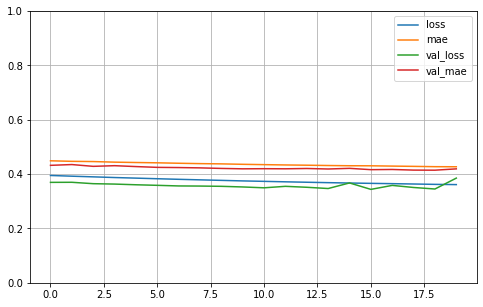

In [41]:
#plot the curves of loss and mae for train and validation sets
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

#note that the lines of the graph are still going down, meaning that if you run more epochs (remember that the model fitting continues from the last epoch), the lines will probabily decrease more

After running the model fit again, the lines seem to be stable now

In [45]:
#predict in a new dataset
X_new = X_test[:3]
X_new

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [46]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.60721976]
 [1.8602647 ]
 [3.792632  ]]
[0.477   0.458   5.00001]
